## Schulz-Zimm distribution:

$P_n = C_0 n^z exp(-n/y)$, $n$ - degree of polymerization

$z$ - width parameter, $M_w / M_n = (z+2) / (z+1)$

$x$ - average degree of polymerization: $x = y(z+1)$

average zip length $= 1/\gamma = k_p / (k_t \bar{R})$

## Distribution moments:

$M_i = \sum_{n=2}^\infty n^i P_n$

$M_1 m_0 =$ sample weight

### Moment equation:

$\frac{dM_i}{dt} = k_s \left( \frac{2}{i+1} - 1 \right) M_{i+1} + \frac{dM_0}{dt} - k_s M_1 - \frac{i}{\gamma} \left( k_s M_i + \frac{dM_i}{dt} \right),  (i \geq 1)$

$M_i = M_1 \prod_{n=2}^{i} (z+n) y^{i-1}$

### First 4 moments in terms of $M_1$, $y$ and $z$:

$M_0 = M_1 / (y (z+1))$

$M_1 = M_1$

$M_2 = M_1 (z+2) y$

$M_3 = M_1 (z+2) (z+3) y^2$

$M_4 = M_1 (z+2) (z+3) (z+4) y^3$

## Dimesionless variables:

$\tau = y^0 k_s t$, $k_s$ - scission constant ($P_n' = -k_s (n-1) P_n$)

$\tilde{M_1} = M_1 / M_1^0$

$\tilde{y} = y/y^0$

$\tilde{\gamma} = \gamma y^0$

$\tilde{x} = x/x^0 = y (z+1) / y^0 (z^0+1)$

$\dots^0$ - initial value

In [1]:
from sympy import *

init_printing(use_latex='mathjax')

tau, k_s, gamma = symbols('t k_s gamma')
# y_0, M1_0 = symbols('y^0, M_1^0')
y_0, M1_0 = symbols('y_0, M_1^0')
M_0 = Symbol('M_0')

t = tau / (y_0 * k_s)
M1w = Function(r'\tilde{M_1}')(tau)
yw = Function(r'\tilde{y}')(tau)
z = Function(r'z')(tau)

In [3]:
M1 = M1w * M1_0
y = yw * y_0

M0 = M1 / (y * (z+1))
M2 = M1 * (z+2) * y
M3 = M1 * (z+2) * (z+3) * y**2
M4 = M1 * (z+2) * (z+3) * (z+4) * y**3

In [4]:
expr_1 = -M1.diff(tau) * y_0 - 1 / gamma * (M1 + M0.diff(tau) * y_0)
expr_2 = -M2.diff(tau) * y_0 + (Rational(2, 3) - 1) * M3 - 2 / gamma * (M2 + M1.diff(tau) * y_0)
expr_3 = -M3.diff(tau) * y_0 + (Rational(2, 4) - 1) * M4 - 3 / gamma * (M3 + M2.diff(tau) * y_0)

In [7]:
print_latex(simplify(expr_1))

\frac{M^{0}_{1} \left(- \gamma y_{0} \left(z{\left(t \right)} + 1\right)^{2} \tilde{y}^{2}{\left(t \right)} \frac{d}{d t} \tilde{M_1}{\left(t \right)} - \left(z{\left(t \right)} + 1\right)^{2} \tilde{M_1}{\left(t \right)} \tilde{y}^{2}{\left(t \right)} + \left(z{\left(t \right)} + 1\right) \tilde{M_1}{\left(t \right)} \frac{d}{d t} \tilde{y}{\left(t \right)} - \left(z{\left(t \right)} + 1\right) \tilde{y}{\left(t \right)} \frac{d}{d t} \tilde{M_1}{\left(t \right)} + \tilde{M_1}{\left(t \right)} \tilde{y}{\left(t \right)} \frac{d}{d t} z{\left(t \right)}\right)}{\gamma \left(z{\left(t \right)} + 1\right)^{2} \tilde{y}^{2}{\left(t \right)}}


In [8]:
simplify((expr_1))

    ⎛                 2          2    d                              2        
M⁰₁⋅⎜- γ⋅y₀⋅(z(t) + 1) ⋅\tilde{y} (t)⋅──(\tilde{M_1}(t)) - (z(t) + 1) ⋅\tilde{
    ⎝                                 dt                                      
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

                 2                                d                           
M_1}(t)⋅\tilde{y} (t) + (z(t) + 1)⋅\tilde{M_1}(t)⋅──(\tilde{y}(t)) - (z(t) + 1
                                                  dt                          
──────────────────────────────────────────────────────────────────────────────
                                   2          2                               
                       γ⋅(z(t) + 1) ⋅\tilde{y} (t)                            

               d                                  

In [9]:
print_latex(simplify(expr_2))

- \frac{M^{0}_{1} y_{0} \left(\gamma y_{0} \left(\left(z{\left(t \right)} + 2\right) \left(z{\left(t \right)} + 3\right) \tilde{M_1}{\left(t \right)} \tilde{y}^{2}{\left(t \right)} + 3 \left(z{\left(t \right)} + 2\right) \tilde{M_1}{\left(t \right)} \frac{d}{d t} \tilde{y}{\left(t \right)} + 3 \left(z{\left(t \right)} + 2\right) \tilde{y}{\left(t \right)} \frac{d}{d t} \tilde{M_1}{\left(t \right)} + 3 \tilde{M_1}{\left(t \right)} \tilde{y}{\left(t \right)} \frac{d}{d t} z{\left(t \right)}\right) + 6 \left(z{\left(t \right)} + 2\right) \tilde{M_1}{\left(t \right)} \tilde{y}{\left(t \right)} + 6 \frac{d}{d t} \tilde{M_1}{\left(t \right)}\right)}{3 \gamma}


In [10]:
simplify(expr_2)

        ⎛     ⎛                                              2                
-M⁰₁⋅y₀⋅⎜γ⋅y₀⋅⎜(z(t) + 2)⋅(z(t) + 3)⋅\tilde{M_1}(t)⋅\tilde{y} (t) + 3⋅(z(t) + 
        ⎝     ⎝                                                               
──────────────────────────────────────────────────────────────────────────────
                                                                              

                  d                                            d              
2)⋅\tilde{M_1}(t)⋅──(\tilde{y}(t)) + 3⋅(z(t) + 2)⋅\tilde{y}(t)⋅──(\tilde{M_1}(
                  dt                                           dt             
──────────────────────────────────────────────────────────────────────────────
                                                       3⋅γ                    

                                    d       ⎞                                 
t)) + 3⋅\tilde{M_1}(t)⋅\tilde{y}(t)⋅──(z(t))⎟ + 6⋅(z(t) + 2)⋅\tilde{M_1}(t)⋅\t
                                    dt      ⎠     

In [26]:
print_latex(simplify(expr_3))

- \frac{M^{0}_{1} y_{0}^{2} \left(\gamma y_{0} \left(\left(z{\left(t \right)} + 2\right) \left(z{\left(t \right)} + 3\right) \left(z{\left(t \right)} + 4\right) \tilde{M_1}{\left(t \right)} \tilde{y}^{2}{\left(t \right)} + 4 \left(z{\left(t \right)} + 2\right) \left(z{\left(t \right)} + 3\right) \tilde{M_1}{\left(t \right)} \frac{d}{d t} \tilde{y}{\left(t \right)} + 2 \left(z{\left(t \right)} + 2\right) \left(z{\left(t \right)} + 3\right) \tilde{y}{\left(t \right)} \frac{d}{d t} \tilde{M_1}{\left(t \right)} + 2 \left(z{\left(t \right)} + 2\right) \tilde{M_1}{\left(t \right)} \tilde{y}{\left(t \right)} \frac{d}{d t} z{\left(t \right)} + 2 \left(z{\left(t \right)} + 3\right) \tilde{M_1}{\left(t \right)} \tilde{y}{\left(t \right)} \frac{d}{d t} z{\left(t \right)}\right) \tilde{y}{\left(t \right)} + 6 \left(z{\left(t \right)} + 2\right) \left(z{\left(t \right)} + 3\right) \tilde{M_1}{\left(t \right)} \tilde{y}^{2}{\left(t \right)} + 6 \left(z{\left(t \right)} + 2\right) \tilde{M_1}{\left(t

In [25]:
simplify(expr_3)

       2 ⎛     ⎛                                                         2    
-M⁰₁⋅y₀ ⋅⎜γ⋅y₀⋅⎜(z(t) + 2)⋅(z(t) + 3)⋅(z(t) + 4)⋅\tilde{M_1}(t)⋅\tilde{y} (t) 
         ⎝     ⎝                                                              
──────────────────────────────────────────────────────────────────────────────
                                                                              

                                         d                                    
+ 4⋅(z(t) + 2)⋅(z(t) + 3)⋅\tilde{M_1}(t)⋅──(\tilde{y}(t)) + 2⋅(z(t) + 2)⋅(z(t)
                                         dt                                   
──────────────────────────────────────────────────────────────────────────────
                                                                              

                   d                                                          
 + 3)⋅\tilde{y}(t)⋅──(\tilde{M_1}(t)) + 2⋅(z(t) + 2)⋅\tilde{M_1}(t)⋅\tilde{y}(
                   dt                             

In [13]:
ans = solve([expr_1, expr_2, expr_3], [M1w.diff(tau), yw.diff(tau), z.diff(tau)])

In [14]:
print_latex(ans[M1w.diff(tau)])

- \frac{\left(9 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{3}{\left(t \right)} + 41 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{2}{\left(t \right)} + 58 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z{\left(t \right)} + 24 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} + 24 \gamma y_{0} \tilde{y}{\left(t \right)} z^{2}{\left(t \right)} + 96 \gamma y_{0} \tilde{y}{\left(t \right)} z{\left(t \right)} + 96 \gamma y_{0} \tilde{y}{\left(t \right)} + 36 z{\left(t \right)} + 72\right) \tilde{M_1}{\left(t \right)} \tilde{y}{\left(t \right)}}{6 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z^{3}{\left(t \right)} + 24 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z^{2}{\left(t \right)} + 30 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z{\left(t \right)} + 12 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} + 18 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{2}{\left(t \right)} + 66 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)}

In [46]:
simplify(ans[M1w.diff(tau)])

          ⎛   2   2          2     3          2   2          2     2          
         -⎝9⋅γ ⋅y⁰ ⋅\tilde{y} (t)⋅z (t) + 41⋅γ ⋅y⁰ ⋅\tilde{y} (t)⋅z (t) + 58⋅γ
──────────────────────────────────────────────────────────────────────────────
   3   3          3     3          3   3          3     2          3   3      
6⋅γ ⋅y⁰ ⋅\tilde{y} (t)⋅z (t) + 24⋅γ ⋅y⁰ ⋅\tilde{y} (t)⋅z (t) + 30⋅γ ⋅y⁰ ⋅\tild

2   2          2               2   2          2                            2  
 ⋅y⁰ ⋅\tilde{y} (t)⋅z(t) + 24⋅γ ⋅y⁰ ⋅\tilde{y} (t) + 24⋅γ⋅y⁰⋅\tilde{y}(t)⋅z (t
──────────────────────────────────────────────────────────────────────────────
    3               3   3          3          2   2          2     2          
e{y} (t)⋅z(t) + 12⋅γ ⋅y⁰ ⋅\tilde{y} (t) + 18⋅γ ⋅y⁰ ⋅\tilde{y} (t)⋅z (t) + 66⋅γ

                                                                   ⎞          
) + 96⋅γ⋅y⁰⋅\tilde{y}(t)⋅z(t) + 96⋅γ⋅y⁰⋅\tilde{y}(t) + 36⋅z(t) + 72⎠⋅\tilde{M_
──────────────────────────────────────────────────

In [15]:
simplify(ans[yw.diff(tau)])

⎛ 3   3          3     5         3   3          3     4         3   3         
⎝γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) + 5⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) + 3⋅γ ⋅y₀ ⋅\tilde{y
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

 3     3          3   3          3     2          3   3          3            
} (t)⋅z (t) - 17⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) - 28⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z(t) - 1
──────────────────────────────────────────────────────────────────────────────
                         ⎛ 3   3          3     3         3   3          3    
                       6⋅⎝γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) + 4⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅

   3   3          3         2   2          2     4          2   2          2  
2⋅γ ⋅y₀ ⋅\tilde{y} (t) + 6⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) + 27⋅γ ⋅y₀ ⋅\tilde{y} (t
──────────────────────────────────────────────────

In [16]:
print_latex(ans[yw.diff(tau)])

\frac{\left(\gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z^{5}{\left(t \right)} + 5 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z^{4}{\left(t \right)} + 3 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z^{3}{\left(t \right)} - 17 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z^{2}{\left(t \right)} - 28 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z{\left(t \right)} - 12 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} + 6 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{4}{\left(t \right)} + 27 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{3}{\left(t \right)} + 19 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{2}{\left(t \right)} - 52 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z{\left(t \right)} - 60 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} + 18 \gamma y_{0} \tilde{y}{\left(t \right)} z^{3}{\left(t \right)} + 42 \gamma y_{0} \tilde{y}{\left(t \right)} z^{2}{\left(t \right)} - 24 \gamma y_{0} \tilde{y}{\left(

In [17]:
simplify(ans[z.diff(tau)])

      ⎛ 2   2          2     5         2   2          2     4          2   2  
-γ⋅y₀⋅⎝γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) + 9⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) + 31⋅γ ⋅y₀ ⋅\
──────────────────────────────────────────────────────────────────────────────
                                                                3   3         
                                                             6⋅γ ⋅y₀ ⋅\tilde{y

        2     3          2   2          2     2          2   2          2     
tilde{y} (t)⋅z (t) + 51⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) + 40⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z
──────────────────────────────────────────────────────────────────────────────
 3     3          3   3          3     2          3   3          3            
} (t)⋅z (t) + 24⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z (t) + 30⋅γ ⋅y₀ ⋅\tilde{y} (t)⋅z(t) + 1

          2   2          2                           4                        
(t) + 12⋅γ ⋅y₀ ⋅\tilde{y} (t) + 6⋅γ⋅y₀⋅\tilde{y}(t)⋅z (t) + 48⋅γ⋅y₀⋅\tilde{y}(
──────────────────────────────────────────────────

In [18]:
print_latex(simplify(ans[z.diff(tau)]))

- \frac{\gamma y_{0} \left(\gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{5}{\left(t \right)} + 9 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{4}{\left(t \right)} + 31 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{3}{\left(t \right)} + 51 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z^{2}{\left(t \right)} + 40 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} z{\left(t \right)} + 12 \gamma^{2} y_{0}^{2} \tilde{y}^{2}{\left(t \right)} + 6 \gamma y_{0} \tilde{y}{\left(t \right)} z^{4}{\left(t \right)} + 48 \gamma y_{0} \tilde{y}{\left(t \right)} z^{3}{\left(t \right)} + 138 \gamma y_{0} \tilde{y}{\left(t \right)} z^{2}{\left(t \right)} + 168 \gamma y_{0} \tilde{y}{\left(t \right)} z{\left(t \right)} + 72 \gamma y_{0} \tilde{y}{\left(t \right)} + 18 z^{3}{\left(t \right)} + 84 z^{2}{\left(t \right)} + 126 z{\left(t \right)} + 60\right) \tilde{y}^{2}{\left(t \right)} z{\left(t \right)}}{6 \gamma^{3} y_{0}^{3} \tilde{y}^{3}{\left(t \right)} z^{3}{\left(t 

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def get_dM1w_dt(gw, M1w, yw, z):

    derivative = -(
            9 * gw ** 2 * yw ** 2 * z ** 3 + 41 * gw ** 2 * yw ** 2 * z ** 2 + 58 * gw ** 2 * yw ** 2 * z +
            24 * gw ** 2 * yw ** 2 + 24 * gw * yw * z ** 2 + 96 * gw * yw * z + 96 * gw * yw + 36 * z + 72
    ) * M1w * yw / (
            6 * gw ** 3 * yw ** 3 * z ** 3 + 24 * gw ** 3 * yw ** 3 * z ** 2 + 30 * gw ** 3 * yw ** 3 * z +
            12 * gw ** 3 * yw ** 3 + 18 * gw ** 2 * yw ** 2 * z ** 2 + 66 * gw ** 2 * yw ** 2 * z +
            60 * gw ** 2 * yw ** 2 + 36 * gw * yw * z + 84 * gw * yw + 36
            )

    return derivative


def get_dy_dt(gw, M1w, yw, z):

    derivative = (
            gw ** 3 * yw ** 3 * z ** 5 + 5 * gw ** 3 * yw ** 3 * z ** 4 + 3 * gw ** 3 * yw ** 3 * z ** 3 -
            17 * gw ** 3 * yw ** 3 * z ** 2 - 28 * gw ** 3 * yw ** 3 * z - 12 * gw ** 3 * yw ** 3 +
            6 * gw ** 2 * yw ** 2 * z ** 4 + 27 * gw ** 2 * yw ** 2 * z ** 3 + 19 * gw ** 2 * yw ** 2 * z ** 2 -
            52 * gw ** 2 * yw ** 2 * z - 60 * gw ** 2 * yw ** 2 + 18 * gw * yw * z ** 3 + 42 * gw * yw * z ** 2 -
            24 * gw * yw * z - 84 * gw * yw - 36
            ) * yw ** 2 / (
                6 * (
                    gw ** 3 * yw ** 3 * z ** 3 + 4 * gw ** 3 * yw ** 3 * z ** 2 + 5 * gw ** 3 * yw ** 3 * z +
                    2 * gw ** 3 * yw ** 3 + 3 * gw ** 2 * yw ** 2 * z ** 2 + 11 * gw ** 2 * yw ** 2 * z +
                    10 * gw ** 2 * yw ** 2 + 6 * gw * yw * z + 14 * gw * yw + 6
                )
            )

    return derivative


def get_dz_dt(gw, M1w, yw, z):

    derivative = -gw * (
            gw ** 2 * yw ** 2 * z ** 5 + 9 * gw ** 2 * yw ** 2 * z ** 4 + 31 * gw ** 2 * yw ** 2 * z ** 3 +
            51 * gw ** 2 * yw ** 2 * z ** 2 + 40 * gw ** 2 * yw ** 2 * z + 12 * gw ** 2 * yw ** 2 +
            6 * gw * yw * z ** 4 + 48 * gw * yw * z ** 3 + 138 * gw * yw * z ** 2 + 168 * gw * yw * z +
            72 * gw * yw + 18 * z ** 3 + 84 * z ** 2 + 126 * z + 60
    ) * yw ** 2 * z / (
            6 * gw ** 3 * yw ** 3 * z ** 3 + 24 * gw ** 3 * yw ** 3 * z ** 2 + 30 * gw ** 3 * yw ** 3 * z +
            12 * gw ** 3 * yw ** 3 + 18 * gw ** 2 * yw ** 2 * z ** 2 + 66 * gw ** 2 * yw ** 2 * z +
            60 * gw ** 2 * yw ** 2 + 36 * gw * yw * z + 84 * gw * yw + 36
    )

    return derivative


def model_general(t, gw, M1w_yw_z):
    M1w, yw, z, = M1w_yw_z[0], M1w_yw_z[1], M1w_yw_z[2]

    dM1w_dt = get_dM1w_dt(gw, M1w, yw, z)
    dyw_dt = get_dy_dt(gw, M1w, yw, z)
    dz_dt = get_dz_dt(gw, M1w, yw, z)

    return np.array([dM1w_dt, dyw_dt, dz_dt])


def RK4_PCH(model, gw, y_0, tt):
    y_i = y_0

    h = tt[1] - tt[0]

    y_sol = np.zeros((len(tt), 3))
    y_sol[0, :] = y_i

    for i, t in enumerate(tt[:-1]):

        y_i = y_sol[i, :]

        if i < 3:  # Runge-Kutta
            K1 = model(t, gw, y_i)
            K2 = model(t + h / 2, gw, y_i + h / 2 * K1)
            K3 = model(t + h / 2, gw, y_i + h / 2 * K2)
            K4 = model(t + h, gw, y_i + h * K3)

            y_new = y_i + h / 6 * (K1 + 2 * K2 + 2 * K3 + K4)
            y_sol[i + 1, :] = y_new

        else:  # predictor-corrector
            f_i = model(tt[i], gw, y_sol[i, :])
            f_i_1 = model(tt[i - 1], gw, y_sol[i - 1, :])
            f_i_2 = model(tt[i - 2], gw, y_sol[i - 2, :])

            # Hamming
            y_pred = y_sol[i - 3, :] + 4 * h / 3 * (2 * f_i - f_i_1 + 2 * f_i_2)
            y_new = 1 / 8 * (9 * y_sol[i, :] - y_sol[i - 2, :]) + 3 / 8 * h * (
                    -f_i_1 + 2 * f_i + model(tt[i + 1], gw, y_pred))

            y_sol[i + 1, :] = y_new

    return y_sol

In [20]:
tau_total = 50
tau_step = 0.001
tau = np.arange(0, tau_total, tau_step)

yw_0 = 1
z_0 = 10
M1w_0 = 1

solution_0p1_m0p8 = RK4_PCH(model_general, 0.1 / (-0.8 + 1), np.array([M1w_0, yw_0, -0.8]), tau)
solution_0p1_0 = RK4_PCH(model_general, 0.1 / (0 + 1), np.array([M1w_0, yw_0, 0]), tau)
solution_0p1_10 = RK4_PCH(model_general, 0.1 / (10 + 1), np.array([M1w_0, yw_0, 10]), tau)
x_0p1_m0p8 = solution_0p1_m0p8[:, 1] * (solution_0p1_m0p8[:, 2] + 1)
x_0p1_0 = solution_0p1_0[:, 1] * (solution_0p1_0[:, 2] + 1)
x_0p1_10 = solution_0p1_10[:, 1] * (solution_0p1_10[:, 2] + 1)

solution_1_m0p8 = RK4_PCH(model_general, 1 / (-0.8 + 1), np.array([M1w_0, yw_0, -0.8]), tau)
solution_1_0 = RK4_PCH(model_general, 1 / (0 + 1), np.array([M1w_0, yw_0, 0]), tau)
solution_1_10 = RK4_PCH(model_general, 1 / (10 + 1), np.array([M1w_0, yw_0, 10]), tau)
x_1_m0p8 = solution_1_m0p8[:, 1] * (solution_1_m0p8[:, 2] + 1)
x_1_0 = solution_1_0[:, 1] * (solution_1_0[:, 2] + 1)
x_1_10 = solution_1_10[:, 1] * (solution_1_10[:, 2] + 1)

solution_2_m0p8 = RK4_PCH(model_general, 2 / (-0.8 + 1), np.array([M1w_0, yw_0, -0.8]), tau)
solution_2_0 = RK4_PCH(model_general, 2 / (0 + 1), np.array([M1w_0, yw_0, 0]), tau)
solution_2_10 = RK4_PCH(model_general, 2 / (10 + 1), np.array([M1w_0, yw_0, 10]), tau)
x_2_m0p8 = solution_2_m0p8[:, 1] * (solution_2_m0p8[:, 2] + 1)
x_2_0 = solution_2_0[:, 1] * (solution_2_0[:, 2] + 1)
x_2_10 = solution_2_10[:, 1] * (solution_2_10[:, 2] + 1)

solution_10_m0p8 = RK4_PCH(model_general, 10 / (-0.8 + 1), np.array([M1w_0, yw_0, -0.8]), tau)
solution_10_0 = RK4_PCH(model_general, 10 / (0 + 1), np.array([M1w_0, yw_0, 0]), tau)
solution_10_10 = RK4_PCH(model_general, 10 / (10 + 1), np.array([M1w_0, yw_0, 10]), tau)
x_10_m0p8 = solution_10_m0p8[:, 1] * (solution_10_m0p8[:, 2] + 1)
x_10_0 = solution_10_0[:, 1] * (solution_10_0[:, 2] + 1)
x_10_10 = solution_10_10[:, 1] * (solution_10_10[:, 2] + 1)

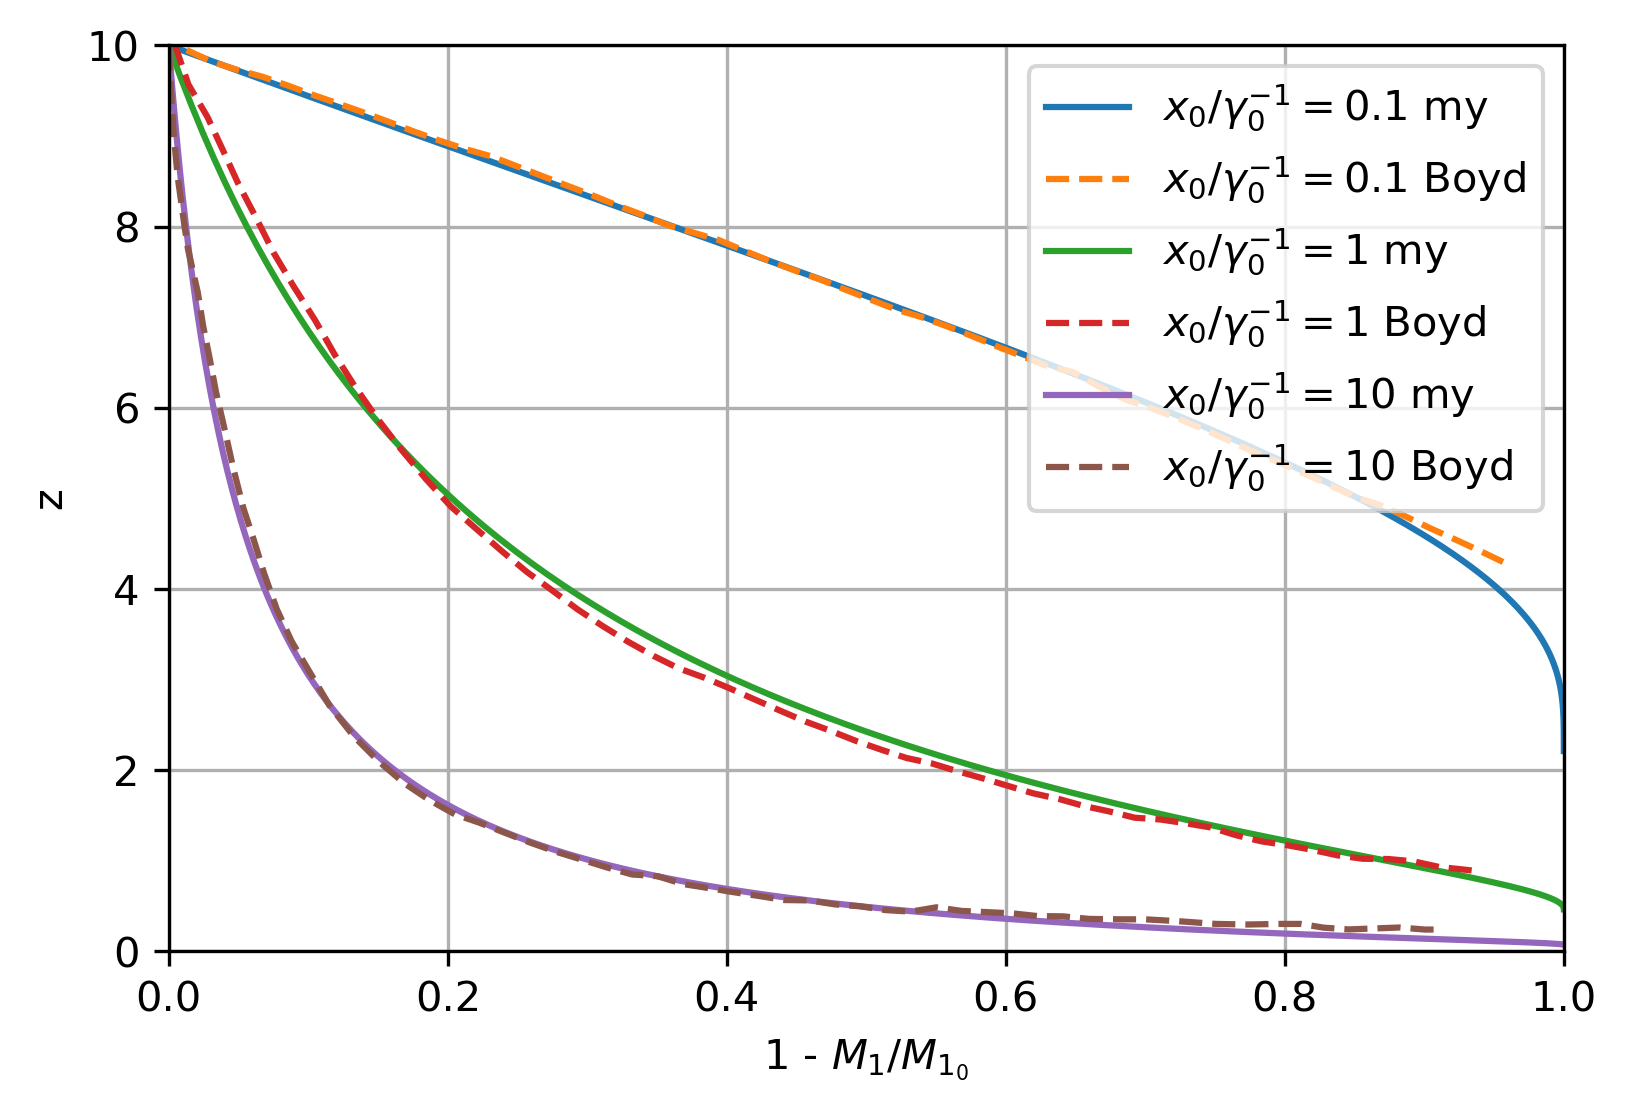

In [21]:
gr_1_0p1_m0p8 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_1_0.1_-0.8.txt')
gr_1_0p1_10 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_1_0.1_10.txt')

gr_1_1_m0p8 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_1_1_-0.8.txt')
gr_1_1_10 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_1_1_10.txt')

gr_1_10_m0p8 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_1_10_-0.8.txt')
gr_1_10_10 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_1_10_10.txt')

str_1 = r'$x_0/ \gamma^{-1}_0=$'
str_2 = r'$z_0=$'

plt.figure(dpi=300)
plt.plot(1 - solution_0p1_10[:, 0], solution_0p1_10[:, 2], label=str_1 + '0.1 my')
plt.plot(gr_1_0p1_10[:, 0], gr_1_0p1_10[:, 1], '--', label=str_1 + '0.1 Boyd')

plt.plot(1 - solution_1_10[:, 0], solution_1_10[:, 2], label=str_1 + '1 my')
plt.plot(gr_1_1_10[:, 0], gr_1_1_10[:, 1], '--', label=str_1 + '1 Boyd')

plt.plot(1 - solution_10_10[:, 0], solution_10_10[:, 2], label=str_1 + '10 my')
plt.plot(gr_1_10_10[:, 0], gr_1_10_10[:, 1], '--', label=str_1 + '10 Boyd')

plt.grid()
plt.legend(loc='upper right')
plt.xlabel('1 - $M_1/M_{1_0}$')
plt.ylabel('z')
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.show()

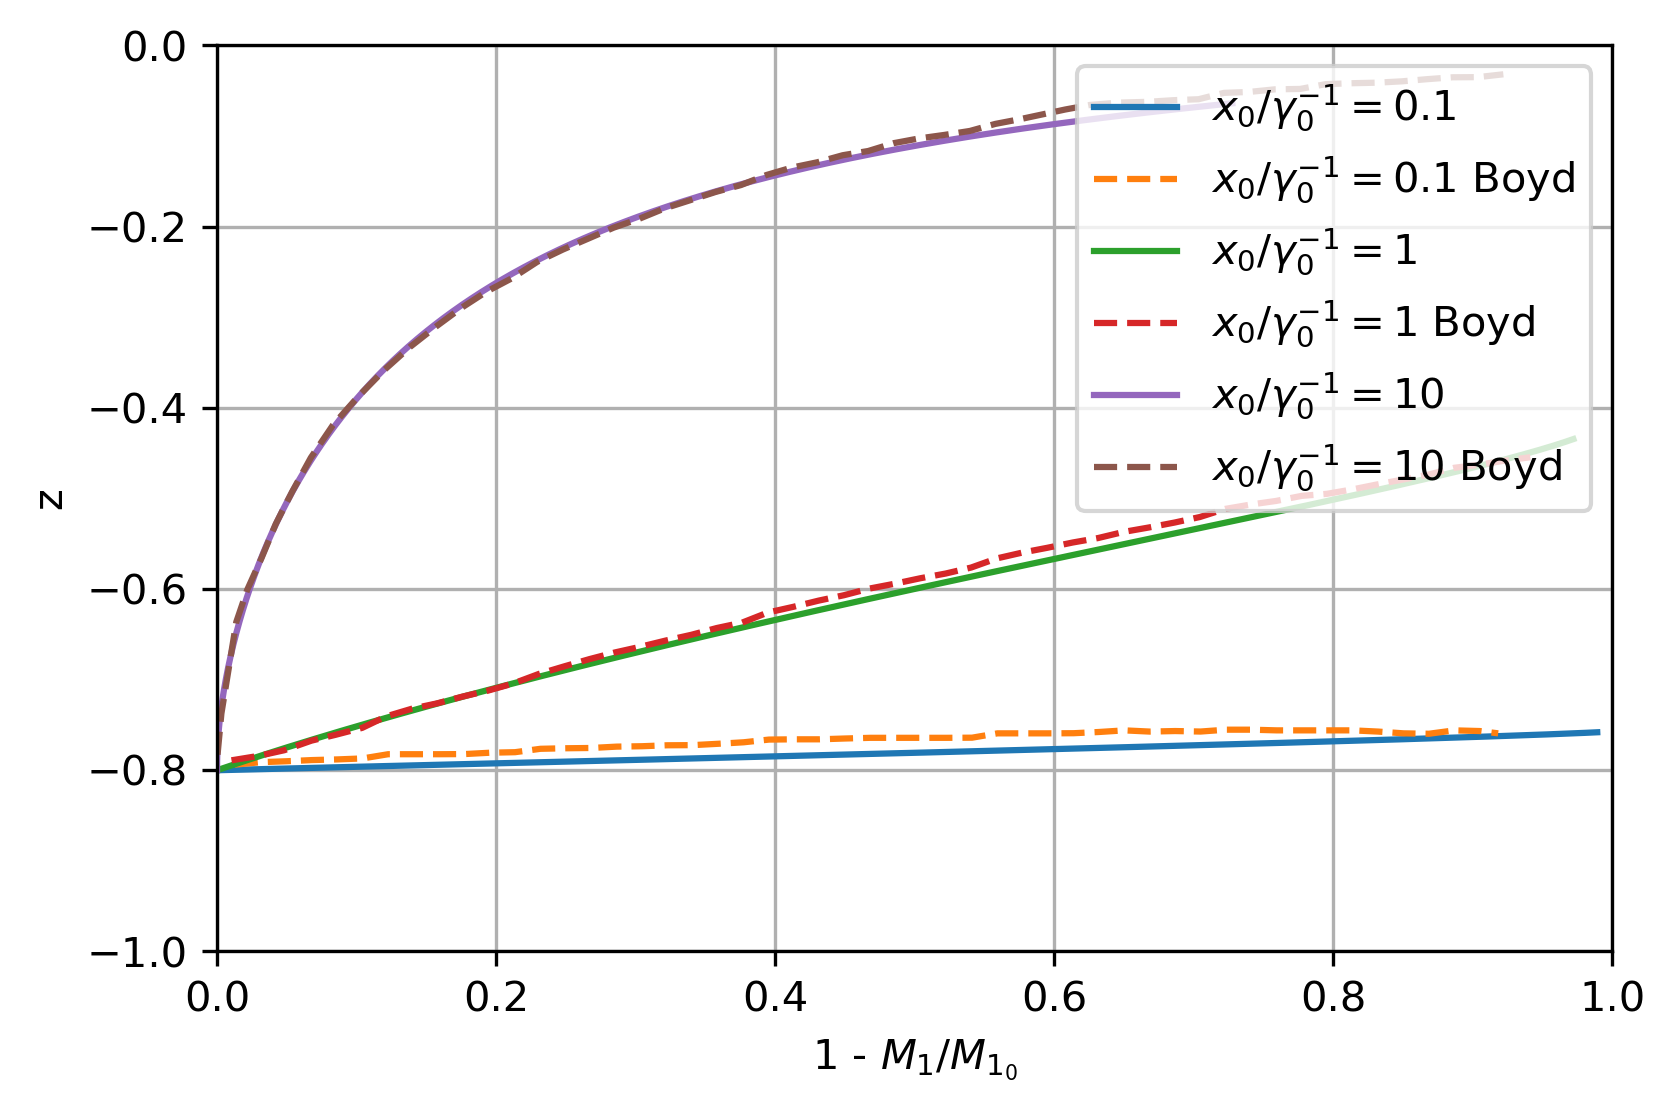

In [22]:
plt.figure(dpi=300)

plt.plot(1 - solution_0p1_m0p8[:, 0], solution_0p1_m0p8[:, 2], label=str_1 + '0.1')
plt.plot(gr_1_0p1_m0p8[:, 0], gr_1_0p1_m0p8[:, 1], '--', label=str_1 + '0.1 Boyd')

plt.plot(1 - solution_1_m0p8[:, 0], solution_1_m0p8[:, 2], label=str_1 + '1')
plt.plot(gr_1_1_m0p8[:, 0], gr_1_1_m0p8[:, 1], '--', label=str_1 + '1 Boyd')

plt.plot(1 - solution_10_m0p8[:, 0], solution_10_m0p8[:, 2], label=str_1 + '10')
plt.plot(gr_1_10_m0p8[:, 0], gr_1_10_m0p8[:, 1], '--', label=str_1 + '10 Boyd')

plt.grid()
plt.legend(loc='upper right')
plt.xlabel('1 - $M_1/M_{1_0}$')
plt.ylabel('z')
plt.xlim(0, 1)
plt.ylim(-1, 0)
plt.show()

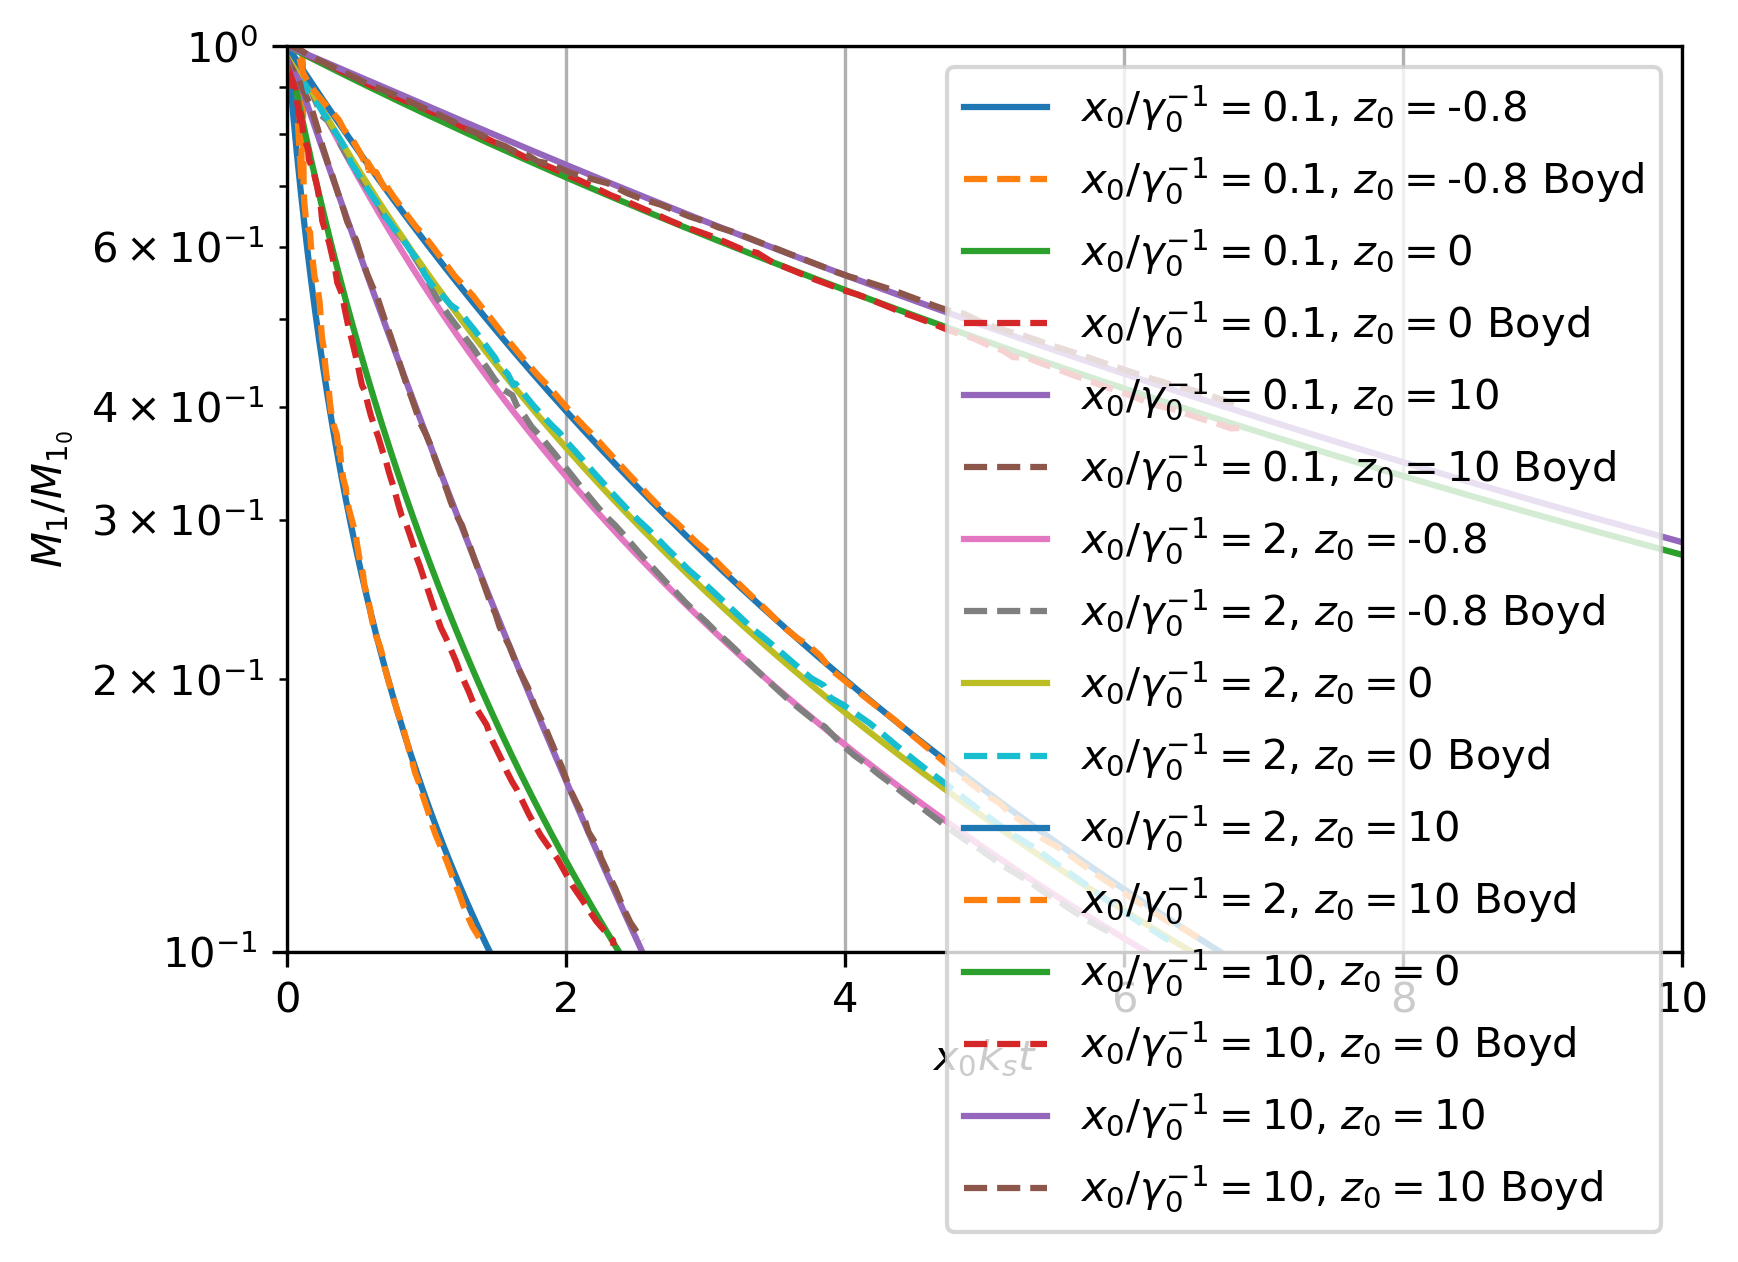

In [23]:
gr_2_0p1_m0p8 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_2_0.1_-0.8.txt')
gr_2_0p1_0 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_2_0.1_0.txt')
gr_2_0p1_10 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_2_0.1_10.txt')

gr_2_2_m0p8 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_2_2_-0.8.txt')
gr_2_2_0 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_2_2_0.txt')
gr_2_2_10 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_2_2_10.txt')

gr_2_10_0 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_2_10_0.txt')
gr_2_10_10 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_2_10_10.txt')

plt.figure(dpi=300)

plt.semilogy(tau * (solution_0p1_m0p8[0, 2] + 1), solution_0p1_m0p8[:, 0], label=str_1 + '0.1, ' + str_2 + '-0.8')
plt.semilogy(gr_2_0p1_m0p8[:, 0], gr_2_0p1_m0p8[:, 1], '--', label=str_1 + '0.1, ' + str_2 + '-0.8 Boyd')

plt.semilogy(tau * (solution_0p1_0[0, 2] + 1), solution_0p1_0[:, 0], label=str_1 + '0.1, ' + str_2 + '0')
plt.semilogy(gr_2_0p1_0[:, 0], gr_2_0p1_0[:, 1], '--', label=str_1 + '0.1, ' + str_2 + '0 Boyd')

plt.semilogy(tau * (solution_0p1_10[0, 2] + 1), solution_0p1_10[:, 0], label=str_1 + '0.1, ' + str_2 + '10')
plt.semilogy(gr_2_0p1_10[:, 0], gr_2_0p1_10[:, 1], '--', label=str_1 + '0.1, ' + str_2 + '10 Boyd')

plt.semilogy(tau * (solution_2_m0p8[0, 2] + 1), solution_2_m0p8[:, 0], label=str_1 + '2, ' + str_2 + '-0.8')
plt.semilogy(gr_2_2_m0p8[:, 0], gr_2_2_m0p8[:, 1], '--', label=str_1 + '2, ' + str_2 + '-0.8 Boyd')

plt.semilogy(tau * (solution_2_0[0, 2] + 1), solution_2_0[:, 0], label=str_1 + '2, ' + str_2 + '0')
plt.semilogy(gr_2_2_0[:, 0], gr_2_2_0[:, 1], '--', label=str_1 + '2, ' + str_2 + '0 Boyd')

plt.semilogy(tau * (solution_2_10[0, 2] + 1), solution_2_10[:, 0], label=str_1 + '2, ' + str_2 + '10')
plt.semilogy(gr_2_2_10[:, 0], gr_2_2_10[:, 1], '--', label=str_1 + '2, ' + str_2 + '10 Boyd')

plt.semilogy(tau * (solution_10_0[0, 2] + 1), solution_10_0[:, 0], label=str_1 + '10, ' + str_2 + '0')
plt.semilogy(gr_2_10_0[:, 0], gr_2_10_0[:, 1], '--', label=str_1 + '10, ' + str_2 + '0 Boyd')

plt.semilogy(tau * (solution_10_10[0, 2] + 1), solution_10_10[:, 0], label=str_1 + '10, ' + str_2 + '10')
plt.semilogy(gr_2_10_10[:, 0], gr_2_10_10[:, 1], '--', label=str_1 + '10, ' + str_2 + '10 Boyd')

plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$x_0 k_s t$')
plt.ylabel('$M_1/M_{1_0}$')
plt.xlim(0, 10)
plt.ylim(0.1, 1)
plt.show()

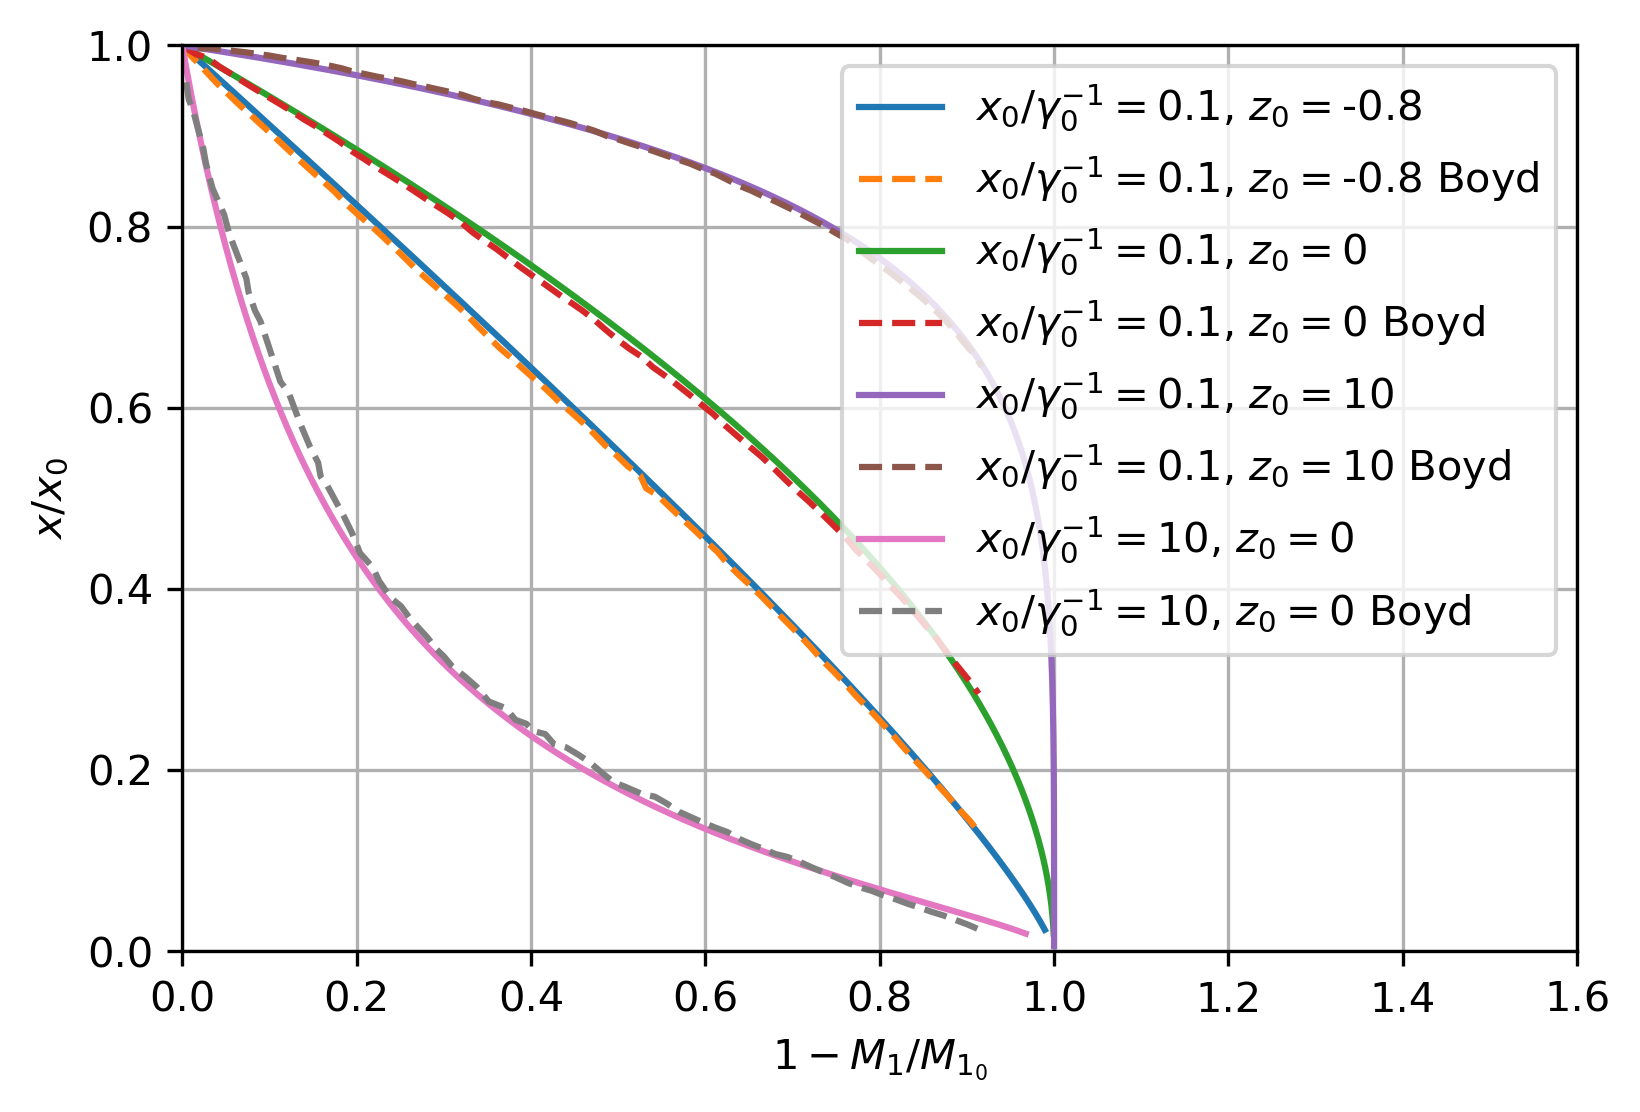

In [24]:
gr_3_0p1_m0p8 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_3_0.1_-0.8.txt')
gr_3_0p1_0 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_3_0.1_0.txt')
gr_3_0p1_10 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_3_0.1_10.txt')
gr_3_10_0 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/Boyd_odeint/curves/Boyd_3_10_0.txt')

plt.figure(dpi=300)

plt.plot(1 - solution_0p1_m0p8[:, 0], x_0p1_m0p8 / x_0p1_m0p8[0], label=str_1 + '0.1, ' + str_2 + '-0.8')
plt.plot(gr_3_0p1_m0p8[:, 0], gr_3_0p1_m0p8[:, 1], '--', label=str_1 + '0.1, ' + str_2 + '-0.8 Boyd')

plt.plot(1 - solution_0p1_0[:, 0], x_0p1_0 / x_0p1_0[0], label=str_1 + '0.1, ' + str_2 + '0')
plt.plot(gr_3_0p1_0[:, 0], gr_3_0p1_0[:, 1], '--', label=str_1 + '0.1, ' + str_2 + '0 Boyd')

plt.plot(1 - solution_0p1_10[:, 0], x_0p1_10 / x_0p1_10[0], label=str_1 + '0.1, ' + str_2 + '10')
plt.plot(gr_3_0p1_10[:, 0], gr_3_0p1_10[:, 1], '--', label=str_1 + '0.1, ' + str_2 + '10 Boyd')

plt.plot(1 - solution_10_0[:, 0], x_10_0 / x_10_0[0], label=str_1 + '10, ' + str_2 + '0')
plt.plot(gr_3_10_0[:, 0], gr_3_10_0[:, 1], '--', label=str_1 + '10, ' + str_2 + '0 Boyd')

plt.grid()
plt.legend(loc='upper right')
plt.xlabel('$1 - M_1/M_{1_0}$')
plt.ylabel('$x / x_0$')
plt.xlim(0, 1.6)
plt.ylim(0, 1)
plt.show()
